In [1]:
import re
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('/content/drive/MyDrive/woc/reviews.csv')
df.sample(5)

reviewId  ...                          appId
9452   gp:AOqpTOGxvgfhiCANN-F5YLFg3KloLupG0IYRscLIr_Q...  ...  com.gmail.jmartindev.timetune
11688  gp:AOqpTOFhiNxWhHkEjxA8Vakq0lccqQHu6ERO-IGsiC9...  ...              com.appxy.planner
170    gp:AOqpTOFpIVs_kRHtuXlO55bVyFFH99K_oRRGK2jisdS...  ...                      com.anydo
3016   gp:AOqpTOF8l6dEhsVTVxnKEbKsX68cOZHYv-qjHoF2tt2...  ...  com.habitrpg.android.habitica
1192   gp:AOqpTOFfMTNah0d0xEaQTbNkg0wqTyb0W14gup0KGnm...  ...                    com.todoist

[5 rows x 12 columns]

In [3]:
df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'sortOrder', 'appId'],
      dtype='object')

In [5]:
print('length of data is', len(df))
print('Shape: ',df. shape)
print(df.info())
df.dtypes
print('no. of null values',np.sum(df.isnull().any(axis=1)))
#df=df.dropna(axis=0, how='any')
print('Shape after drop: ',df. shape)
df=df.interpolate(method ='linear', limit_direction ='forward')


length of data is 12495
Shape:  (12495, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12495 entries, 0 to 12494
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              12495 non-null  object
 1   userName              12495 non-null  object
 2   userImage             12495 non-null  object
 3   content               12495 non-null  object
 4   score                 12495 non-null  int64 
 5   thumbsUpCount         12495 non-null  int64 
 6   reviewCreatedVersion  10333 non-null  object
 7   at                    12495 non-null  object
 8   replyContent          5818 non-null   object
 9   repliedAt             5818 non-null   object
 10  sortOrder             12495 non-null  object
 11  appId                 12495 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.1+ MB
None
no. of null values 7863
Shape after drop:  (12495, 12)


In [6]:
df['score'].unique()


array([1, 2, 3, 4, 5])

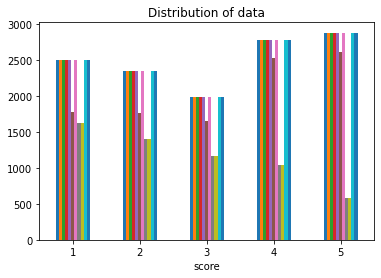

In [7]:
ax = df.groupby('score').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['1','2','3','4','5'], rotation=0)
text, sentiment = list(df['content']), list(df['score'])


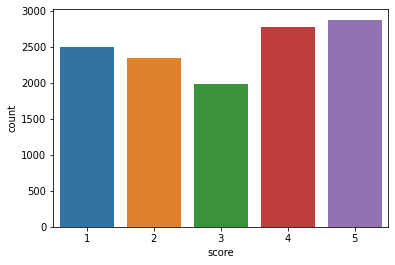

In [8]:
import seaborn as sns
sns.countplot(x='score', data=df)

In [9]:
data=df[['content','score']]
score_1 = data[data['score'] == 1]
score_2 = data[data['score'] == 2]
score_3 = data[data['score'] == 3]
score_4 = data[data['score'] == 4]
score_5 = data[data['score'] == 5]
dataset = pd.concat([score_1, score_2,score_3,score_4,score_5])
dataset['content']=dataset['content'].str.lower()
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['content'] = dataset['content'].apply(lambda text: cleaning_stopwords(text))


In [10]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['content']= dataset['content'].apply(lambda x: cleaning_punctuations(x))

def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['content'] = dataset['content'].apply(lambda x: cleaning_repeating_char(x))

def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['content'] = dataset['content'].apply(lambda x: cleaning_numbers(x))
dataset['content'].tail()

12490    really like planner helps achieve tasks goals ...
12491                                                   😁😁
12492                                 useful apps must try
12493    would pay even additions updates absolutely lo...
12494                                           sooow good
Name: content, dtype: object

In [11]:
def get_nltk_tokenized(x):
  return nltk.word_tokenize(x)
df['content']=df['content'].apply(get_nltk_tokenized)

import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['content']= dataset['content'].apply(lambda x: stemming_on_text(x))

lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['content'] = dataset['content'].apply(lambda x: lemmatizer_on_text(x))
dataset['content'].head()

0                              cannot open app anymore
1             begging refund app month nobody replying
2    costly premium version approx indian rupees  p...
3    used keep organized  updates made mess things ...
4                                    dan birthday oct 
Name: content, dtype: object

In [12]:
X=data.content
y=data.score

In [13]:
len(score_2)

2344

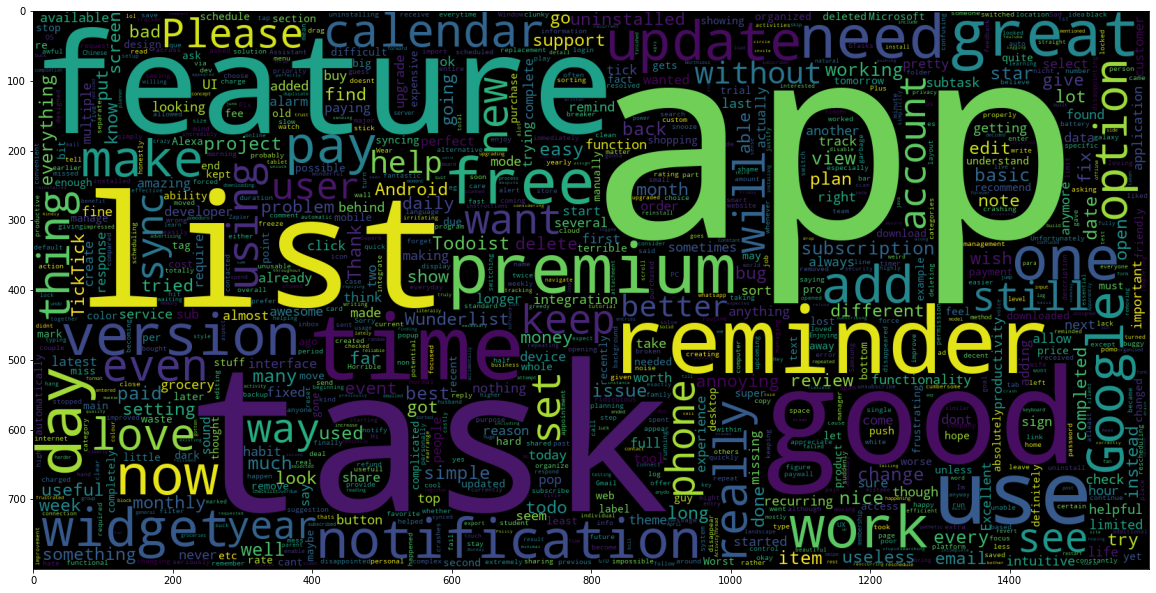

In [14]:
data_1 = data['content'][:len(score_1)]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_1))
plt.imshow(wc)

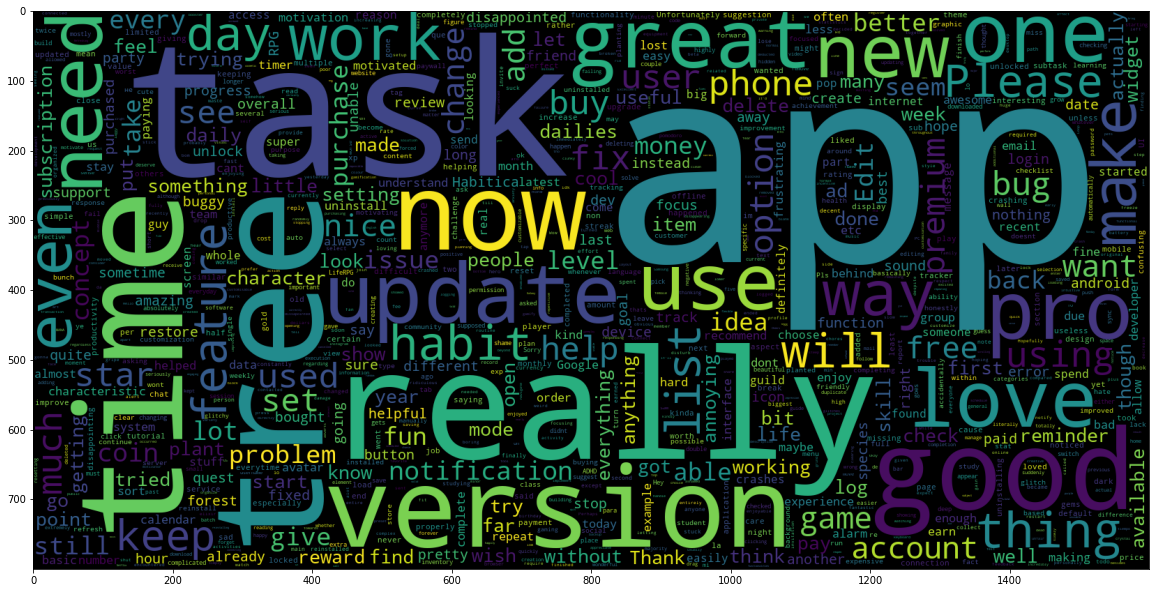

In [41]:
data_2 = data['content'][len(score_1)+1:(len(score_1)+len(score_2))]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_2))
plt.imshow(wc)

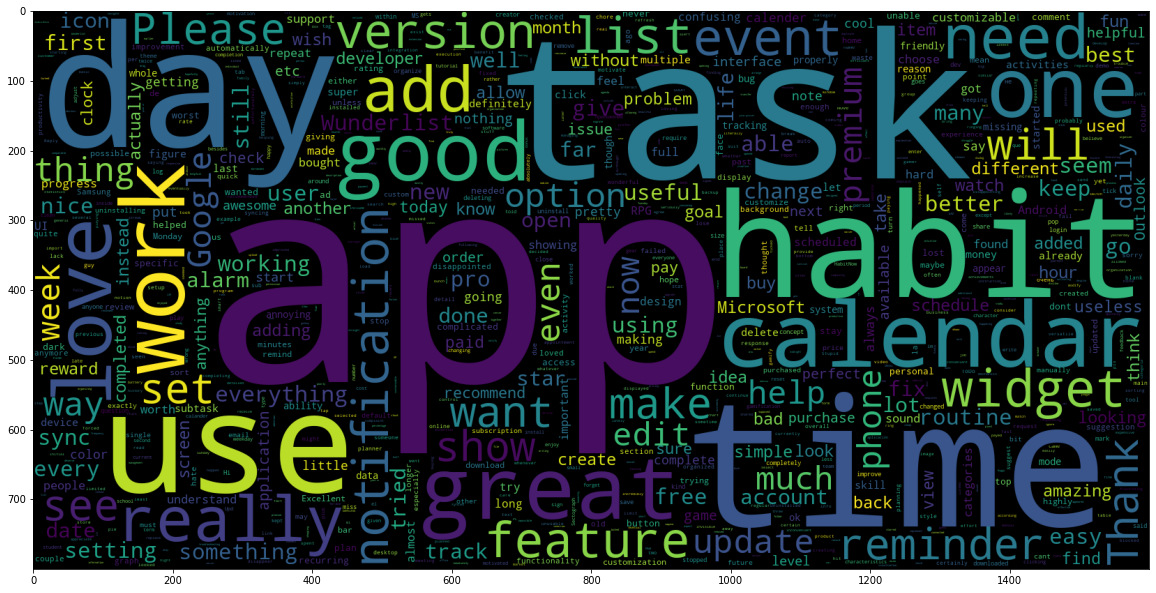

In [42]:
data_3 = data['content'][(len(score_1)+len(score_2))+1:(len(score_1)+len(score_2)+len(score_3))]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_3))
plt.imshow(wc)

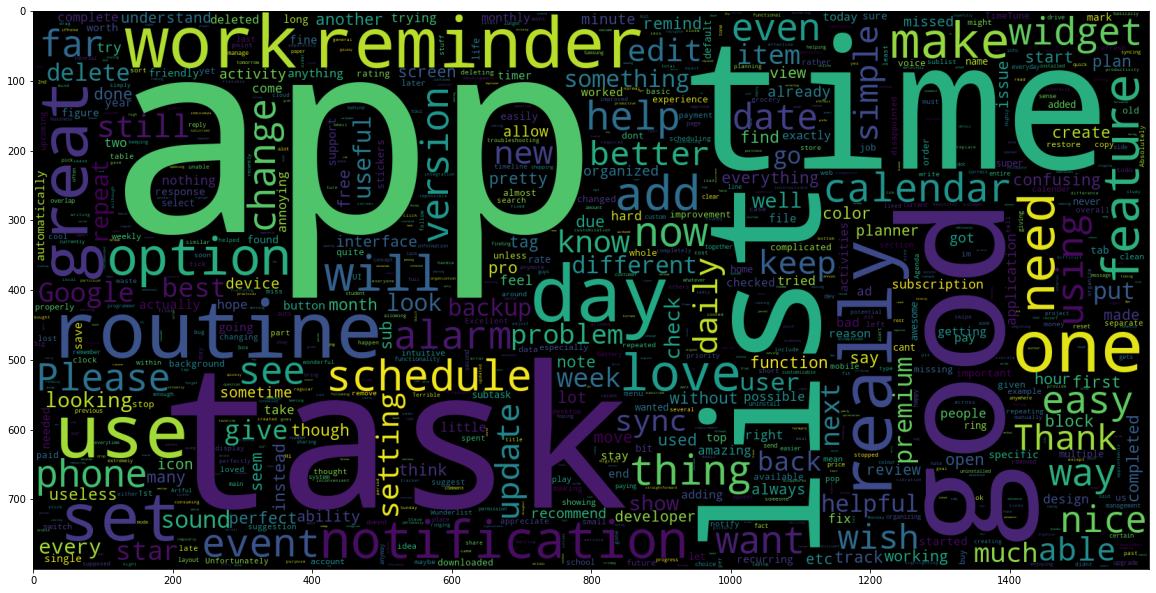

In [43]:
data_4 = data['content'][(len(score_1)+len(score_2)+len(score_3))+1:(len(score_1)+len(score_2)+len(score_3)+len(score_4))]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_4))
plt.imshow(wc)

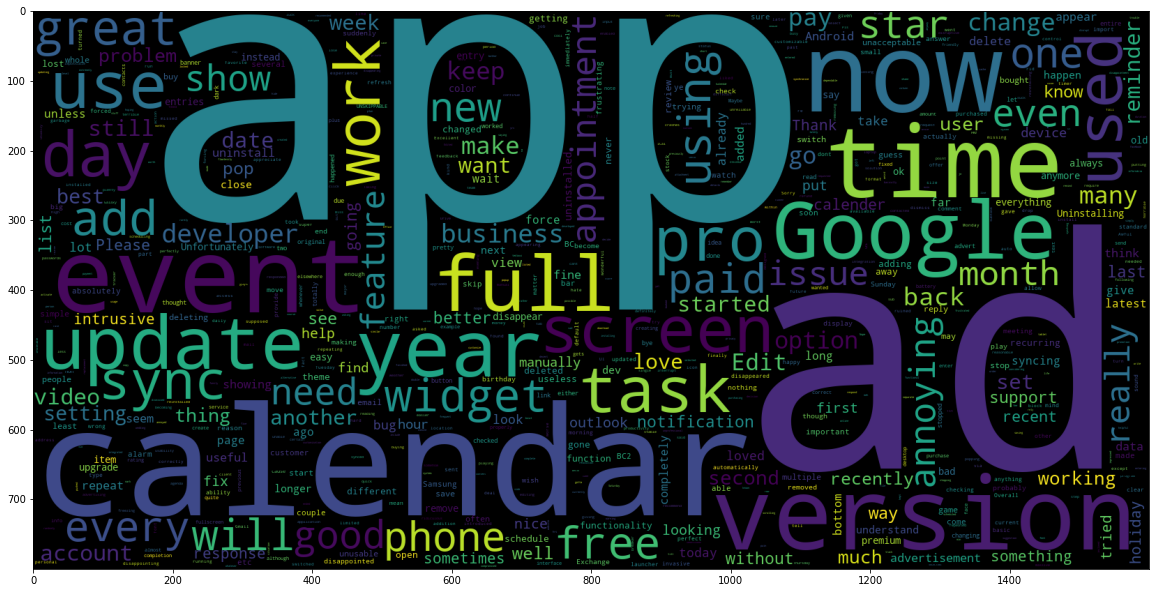

In [44]:
data_5 = data['content'][(len(score_1)+len(score_2)+len(score_3)+len(score_4))+1:]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_5))
plt.imshow(wc)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [52]:
vectoriser = TfidfVectorizer(ngram_range=(1,5), max_features=4632)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  4632


In [53]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [35]:
def model_Evaluate(model):
# Predict values for Test dataset
  y_pred = model.predict(X_test)
  # Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
  # Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['1','2','3','4','5']
  group_names = ['','', '','','','', '','','','','','','','','','','','','','','','','','','']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1} {v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(5,5)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           1       0.51      0.39      0.45       132
           2       0.33      0.29      0.31       123
           3       0.32      0.23      0.27       101
           4       0.46      0.23      0.30       140
           5       0.38      0.81      0.52       129

    accuracy                           0.40       625
   macro avg       0.40      0.39      0.37       625
weighted avg       0.41      0.40      0.37       625



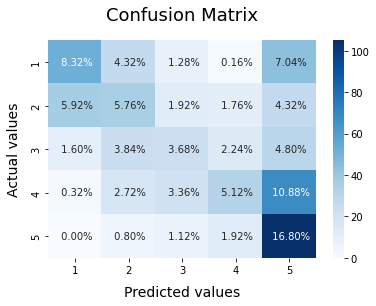

In [54]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)


              precision    recall  f1-score   support

           1       0.51      0.52      0.51       132
           2       0.36      0.33      0.34       123
           3       0.30      0.30      0.30       101
           4       0.40      0.36      0.38       140
           5       0.57      0.67      0.62       129

    accuracy                           0.44       625
   macro avg       0.43      0.44      0.43       625
weighted avg       0.43      0.44      0.44       625



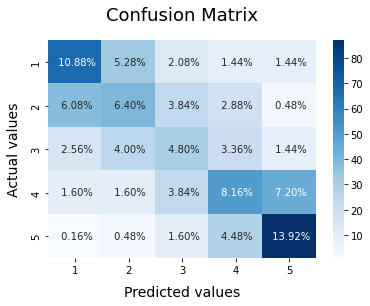

In [55]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

              precision    recall  f1-score   support

           1       0.51      0.52      0.51       132
           2       0.38      0.38      0.38       123
           3       0.33      0.30      0.31       101
           4       0.42      0.39      0.40       140
           5       0.59      0.68      0.64       129

    accuracy                           0.46       625
   macro avg       0.45      0.45      0.45       625
weighted avg       0.45      0.46      0.46       625



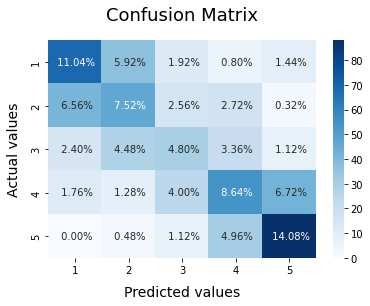

In [56]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)